In [2]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

Load EEG data as raw mne file and display info

In [1]:
data_filename = "dados\\SUBJ002\\datasetSubj002.set"
marc_filename = "dados\\SUBJ002\\Marcsubject2.mat"
mat_content = scipy.io.loadmat(marc_filename)
time_events = mat_content['marcadores']

NameError: name 'scipy' is not defined

In [92]:
#raw = mne.io.read_raw_brainvision("dados\\SUBJ001\\SUBJ001.vhdr") # EEG + other sensors channels
raw = mne.io.read_raw_eeglab(data_filename) #only EEG
print(raw.info)

Reading dados\SUBJ002\datasetSubj002.fdt
<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 63 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 63
 projs: []
 sfreq: 1000.0 Hz
>


<ipython-input-92-c05ab7edb41c>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab("dados\\SUBJ002\\datasetSubj002.set") #only EEG


In [93]:
raw.ch_names

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'T7',
 'T8',
 'P7',
 'P8',
 'Fz',
 'Cz',
 'Pz',
 'Oz',
 'FC1',
 'FC2',
 'CP1',
 'CP2',
 'FC5',
 'FC6',
 'CP5',
 'CP6',
 'TP9',
 'TP10',
 'POz',
 'F1',
 'F2',
 'C1',
 'C2',
 'P1',
 'P2',
 'AF3',
 'AF4',
 'FC3',
 'FC4',
 'CP3',
 'CP4',
 'PO3',
 'PO4',
 'F5',
 'F6',
 'C5',
 'C6',
 'P5',
 'P6',
 'AF7',
 'AF8',
 'FT7',
 'FT8',
 'TP7',
 'TP8',
 'PO7',
 'PO8',
 'FT9',
 'FT10',
 'Fpz',
 'CPz']

In [94]:
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

<RawEEGLAB | datasetSubj002.fdt, 63 x 3685720 (3685.7 s), ~88 kB, data not loaded>

In [95]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 63 EEG
 custom_ref_applied: False
 dig: 66 items (3 Cardinal, 63 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 63
 projs: []
 sfreq: 1000.0 Hz
>

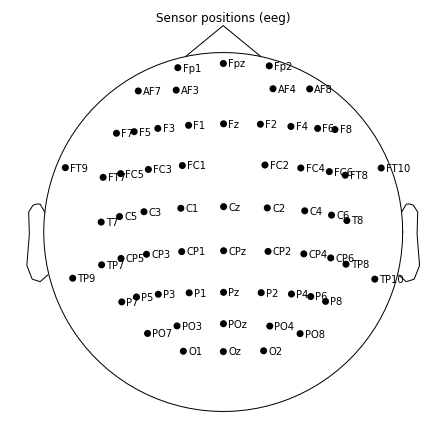

In [96]:
raw.plot_sensors(show_names = True);

Plot EEG signals

In [123]:
#data, times = raw[raw.ch_names, 10000:310000]
filt_raw = raw.copy()
filt_raw.load_data()
filt_raw.filter(0.1,45, phase="zero-double", method = "iir", iir_params= dict(order=4, ftype='cheby1', rp=0.5))
filt_raw.notch_filter(np.arange(60, 241, 60))


Reading 0 ... 3685719  =      0.000 ...  3685.719 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

IIR filter parameters
---------------------
Chebyshev I bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.10, 45.00 Hz: -1.00, -1.00 dB

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)



<RawEEGLAB | datasetSubj002.fdt, 63 x 3685720 (3685.7 s), ~1.73 GB, data loaded>

In [124]:
filt_downsample = filt_raw.copy().resample(200, npad='auto')

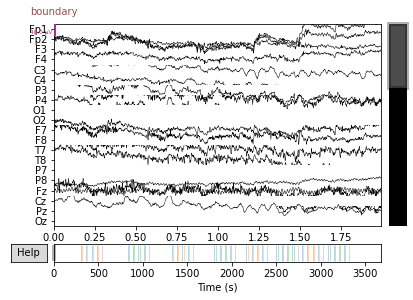

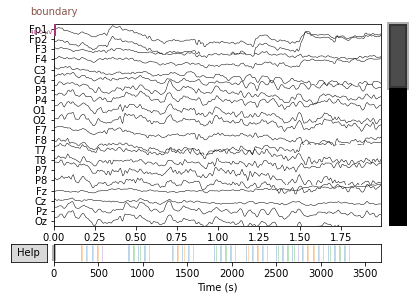

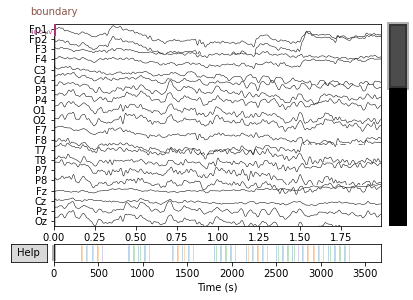

In [125]:
raw.plot(duration=2, n_channels=20, remove_dc=False);
filt_raw.plot(duration=2, n_channels=20, remove_dc=False);
filt_downsample.plot(duration=2, n_channels=20, remove_dc=False);

Plot PSD of signals

In [126]:
print(raw['P3',:][0].shape)
print(filt_raw['P3',:][0].shape)
print(filt_downsample['P3',:][0].shape)

(1, 3685720)
(1, 3685720)
(1, 737144)


Effective window size : 2.048 (s)


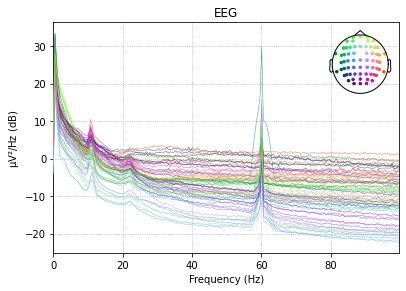

Effective window size : 2.048 (s)


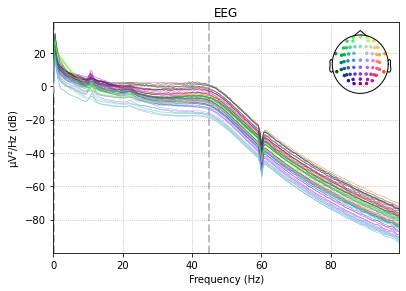

Effective window size : 10.240 (s)


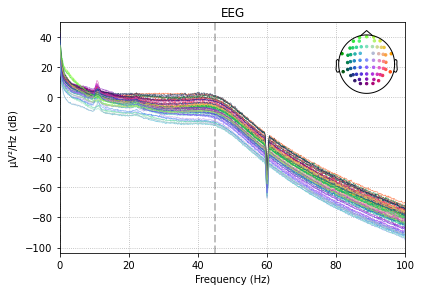

In [33]:
raw.plot_psd(fmax=100);
filt_raw.plot_psd(fmax=100);
filt_downsample.plot_psd(fmax=100);

Apply CSD (Laplacian filter)

Fitted sphere radius:         91.8 mm
Origin head coordinates:      0.9 7.0 48.5 mm
Origin device coordinates:    0.9 7.0 48.5 mm


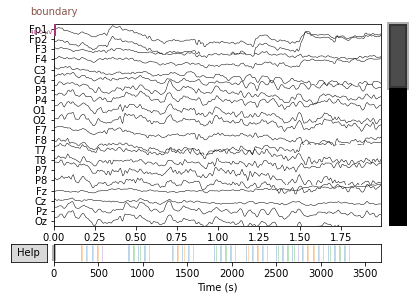

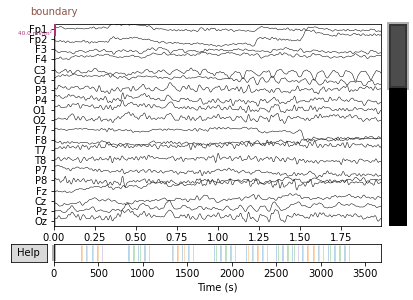

In [127]:
filt_csd = mne.preprocessing.compute_current_source_density(filt_downsample)
filt_raw.plot(duration=2, n_channels=20, remove_dc=False)
filt_csd.plot(duration=2, n_channels=20, remove_dc=False);

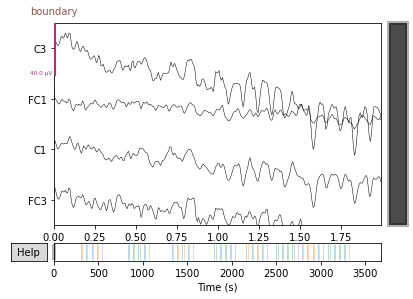

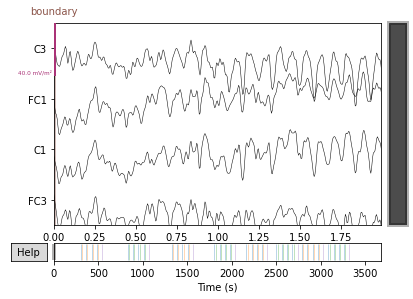

In [128]:
raw_temp = filt_raw.copy()
csd_temp = filt_csd.copy()
picks = raw_temp.pick_channels(['C1','C3','FC1','FC3'])
picks = csd_temp.pick_channels(['C1','C3','FC1','FC3'])
raw_temp.plot(duration=2, n_channels=20, remove_dc=False)
csd_temp.plot(duration=2, n_channels=20, remove_dc=False);

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 63 EEG
 custom_ref_applied: False
 dig: 66 items (3 Cardinal, 63 EEG)
 highpass: 0.1 Hz
 lowpass: 45.0 Hz
 meas_date: unspecified
 nchan: 63
 projs: []
 sfreq: 1000.0 Hz
>
Not setting metadata
Not setting metadata
3685 matching events found
No baseline correction applied
No gradiometers found. Forcing n_grad to 0
No magnetometers found. Forcing n_mag to 0
Adding projection: eeg-Raw-0.000-3685.720-PCA-01
Adding projection: eeg-Raw-0.000-3685.720-PCA-02
Adding projection: eeg-Raw-0.000-3685.720-PCA-03
Adding projection: eeg-Raw-0.000-3685.720-PCA-04
Adding projection: eeg-Raw-0.000-3685.720-PCA-05
Adding projection: eeg-Raw-0.000-3685.720-PCA-06
Adding projection: eeg-Raw-0.000-3685.720-PCA-07
Adding projection: eeg-Raw-0.000-3685.720-PCA-08
Adding projection: eeg-Raw-0.000-3685.720-PCA-09
Adding projection: eeg-Raw-0.000-3685.720-PCA-10


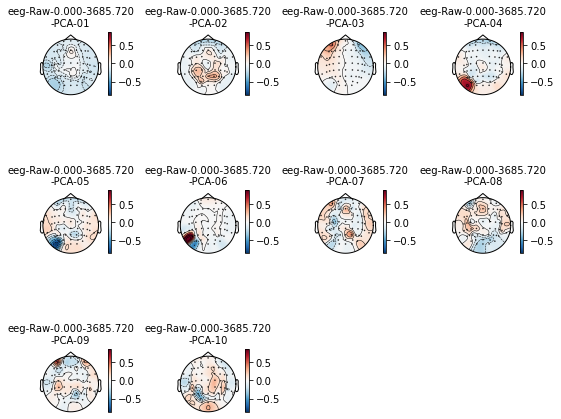

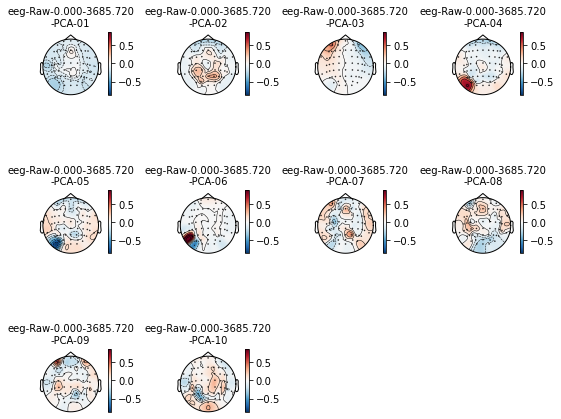

In [129]:
#data, times = raw_temp[raw_temp.ch_names, 10000:310000]
print(filt_raw.info)
raw_temp_projs = mne.compute_proj_raw(filt_raw, n_eeg=10)
mne.viz.plot_projs_topomap(raw_temp_projs, colorbar=True, vlim='joint',
                           info=filt_raw.info)

#csd_temp.plot_projs_topomap(ch_type='eeg')

Marcação de eventos ao longo do sinal

In [130]:
seq_events = np.array([[0,1,0,1,0,1,0,1,0,0,2,0,2,0,2,0,2,0]],dtype='int32')
#seq_events = np.array([[0,1,0,1,0,1,0,1,0,3,0,2,0,2,0,2,0,2,0,3]],dtype='int32')
seq_events = np.repeat(seq_events,4, axis=0)
seq_events = seq_events.flatten()
seq_events = np.reshape(seq_events,[len(seq_events),1])
zero_column = np.zeros([len(seq_events),1],dtype='int32')
array_events = np.concatenate([time_events[1:],zero_column], axis=1)
array_events = np.concatenate([array_events,seq_events],axis=1)
events_id = {'neutro':0,'ternura':1,'angustia':2}

In [131]:
print(array_events)
print(np.diff(array_events[:,0]))

[[ 303143       0       0]
 [ 316284       0       1]
 [ 362286       0       0]
 [ 377301       0       1]
 [ 423312       0       0]
 [ 438315       0       1]
 [ 484329       0       0]
 [ 496346       0       1]
 [ 542361       0       0]
 [ 834184       0       0]
 [ 846184       0       2]
 [ 892199       0       0]
 [ 905216       0       2]
 [ 951216       0       0]
 [ 963231       0       2]
 [1009245       0       0]
 [1024261       0       2]
 [1070277       0       0]
 [1324568       0       0]
 [1339954       0       1]
 [1385966       0       0]
 [1397969       0       1]
 [1443985       0       0]
 [1459001       0       1]
 [1505015       0       0]
 [1520015       0       1]
 [1566047       0       0]
 [1806666       0       0]
 [1819673       0       2]
 [1865683       0       0]
 [1877685       0       2]
 [1923701       0       0]
 [1936718       0       2]
 [1982732       0       0]
 [1994748       0       2]
 [2040761       0       0]
 [2164118       0       0]
 

In [132]:
epochs = mne.Epochs(filt_raw, array_events, event_id=events_id, tmin=-0.1, tmax=46,
                    preload=True)

Not setting metadata
Not setting metadata
72 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 72 events and 46101 original time points ...
0 bad epochs dropped


In [133]:
evoked_ternura = epochs['ternura'].average()
evoked_angustia = epochs['angustia'].average()
evoked_neutro = epochs['neutro'].average()

In [134]:
evoked_csd_ternura = mne.preprocessing.compute_current_source_density(evoked_ternura, stiffness = 3)
evoked_csd_angustia = mne.preprocessing.compute_current_source_density(evoked_angustia,  stiffness = 3)
evoked_csd_neutro = mne.preprocessing.compute_current_source_density(evoked_neutro,  stiffness = 3)

Fitted sphere radius:         91.8 mm
Origin head coordinates:      0.9 7.0 48.5 mm
Origin device coordinates:    0.9 7.0 48.5 mm
Fitted sphere radius:         91.8 mm
Origin head coordinates:      0.9 7.0 48.5 mm
Origin device coordinates:    0.9 7.0 48.5 mm
Fitted sphere radius:         91.8 mm
Origin head coordinates:      0.9 7.0 48.5 mm
Origin device coordinates:    0.9 7.0 48.5 mm


No projector specified for this dataset. Please consider the method self.add_proj.


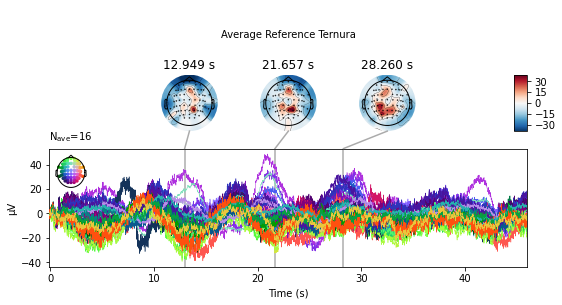

No projector specified for this dataset. Please consider the method self.add_proj.


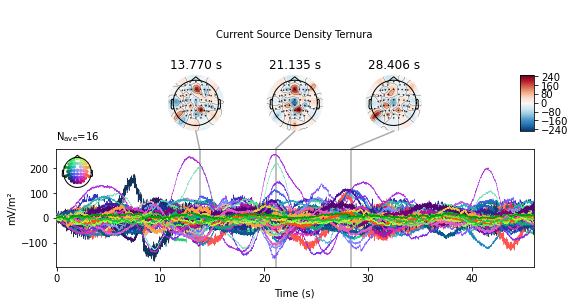

No projector specified for this dataset. Please consider the method self.add_proj.


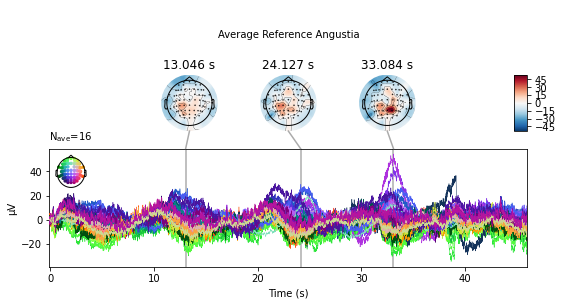

No projector specified for this dataset. Please consider the method self.add_proj.


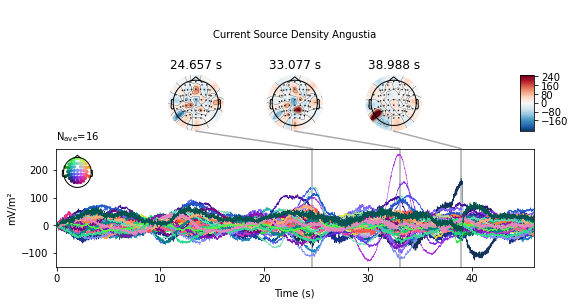

No projector specified for this dataset. Please consider the method self.add_proj.


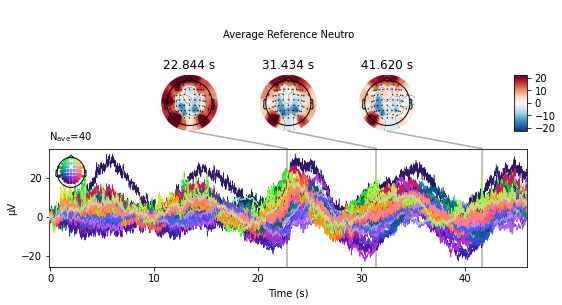

No projector specified for this dataset. Please consider the method self.add_proj.


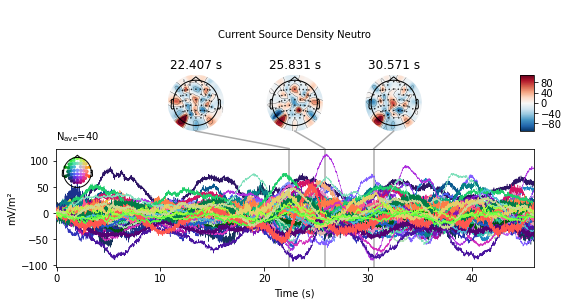

In [135]:
#evoked.plot_joint(title='Average Reference', show=False);
evoked_ternura.plot_joint(title='Average Reference Ternura');
evoked_csd_ternura.plot_joint(title='Current Source Density Ternura');
evoked_angustia.plot_joint(title='Average Reference Angustia');
evoked_csd_angustia.plot_joint(title='Current Source Density Angustia');
evoked_neutro.plot_joint(title='Average Reference Neutro');
evoked_csd_neutro.plot_joint(title='Current Source Density Neutro');

Extract data from raw object, pick all channels in a given range, filter it and plot them all